In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Baca Dataset

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# cek semua hal mengenai data
print('1. Ukuran dimensi data titanic :', titanic.shape)

print('\n2. Informasi data titanic :\n')
print(titanic.info())

print('\n3. Informasi statistical data titanic:\n')
print(titanic.describe())

print('\n4. Data kosong pada data titanic :\n')
print(titanic.isna().sum())

print('\n5. Total data kosong :', titanic.isna().sum().sum())

1. Ukuran dimensi data titanic : (891, 15)

2. Informasi data titanic :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None



Setelah sedikit mengeksplore data, beberapa hal yang didapati yaitu :
1. Terdapat 891 baris dan 15 kolom 
2. Pada data describe kolom age, hasil min diketahui terdapat penumpang bayi masih berumur 5 bulan dan yang tertua berumur 80 tahun
3. Terdapat 177 data kosong pada kolom age, 2 data kosong pada kolom embarked, 688 data kosong pada kolom deck, 2 data kosong pada kolom embark_town
4. Maka total 869 data kosong pada data titanic ini.

/home/dicky/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


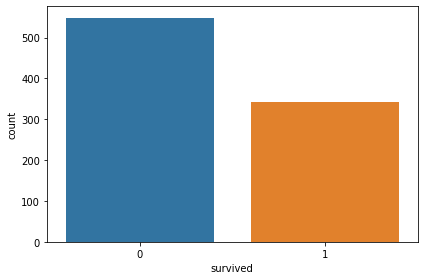

Adapun detail yang berhasil survive maupun tidak adalah sebagai berikut.



0    549
1    342
Name: survived, dtype: int64

In [4]:
# Kita coba menvisualisasikan data orang yang berhasil selamat dari bencana kapan titanic
sns.countplot(titanic['survived'])
plt.tight_layout()
plt.show()

print('Adapun detail yang berhasil survive maupun tidak adalah sebagai berikut.\n')
titanic['survived'].value_counts()

Data 0 merupakan data kematian, dan data 1 merupakan data yang berhasil selamat pada bencana kapan Titanic. Terlihat bahwa banyak yang tidak berhasil survive dari bencana kapan Titanic ini.

Selanjutnya akan coba memperlihatkan data berhasil survive maupun sebaliknnya terhadap kolom 'who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked'

/home/dicky/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dicky/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dicky/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dicky/.local/

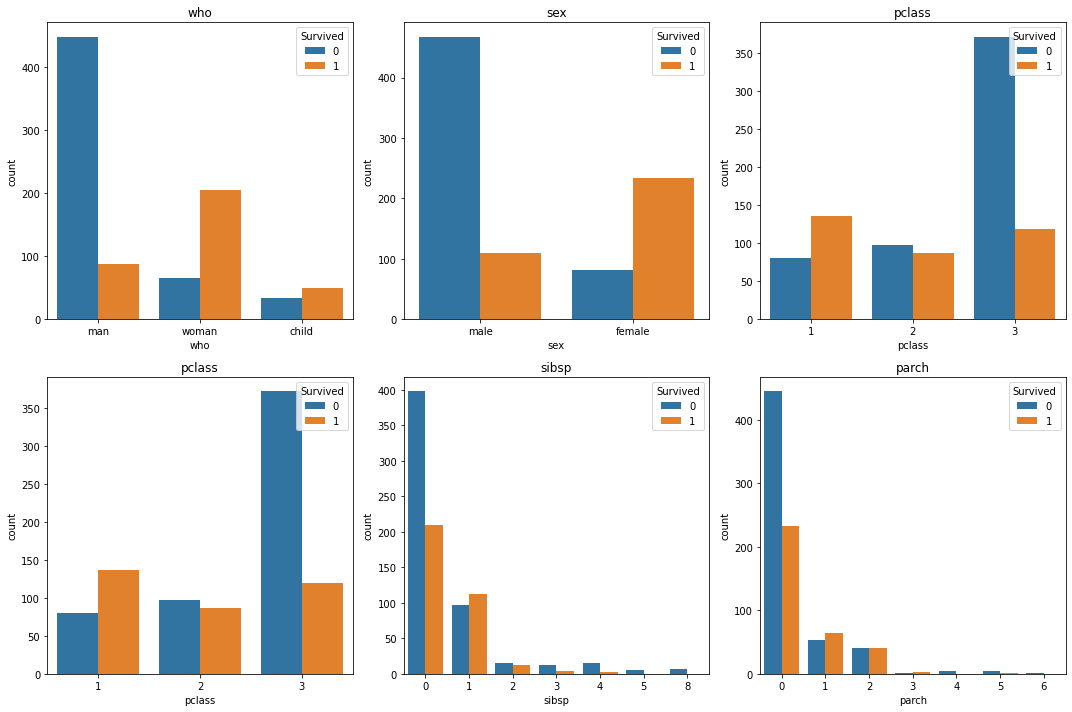

In [5]:
columns = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows, n_cols = 2, 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_rows + c
        ax = axs[r][c]
        sns.countplot(titanic[columns[i]], hue=titanic['survived'], ax=ax)
        ax.set_title(columns[i])
        ax.legend(title='Survived', loc='upper right')

plt.tight_layout()
plt.show()

In [6]:
# Jika kita ingin melihat rata-rata kematian male terhadap female maka menjadi seperti berikut.
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

terlihat sangat kecilnya tingkat keselamatan pada laki-laki dibandingkan perempuan

Data orang yang berhasil survive terhadap umur yang dilihat dari kelas kamar yang mereka ambil :

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


<AxesSubplot:title={'center':'\nHuman has survived by sex and class'}, xlabel='sex'>

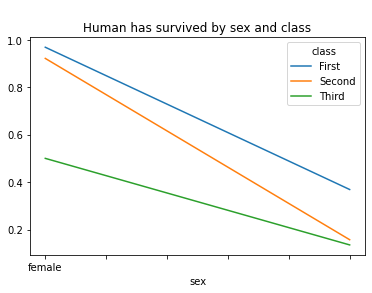

In [7]:
# Jika kita ingin melihat data berhasil survive terhadap umur yang dilihat dari kelas kapan yang mereka miliki saat itu
print('Data orang yang berhasil survive terhadap umur yang dilihat dari kelas kamar yang mereka ambil :\n')
print(titanic.pivot_table('survived',index='sex', columns='class'))

titanic.pivot_table('survived',index='sex', columns='class').plot(title='\nHuman has survived by sex and class')

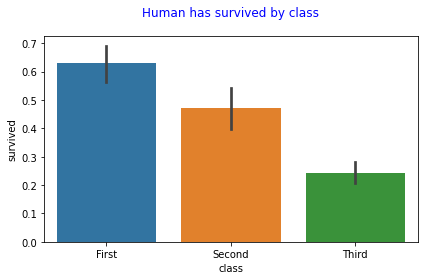

In [8]:
# dapat lebih jelasnya kita bisa melihat data keselamatan berdasarkan class kapal sebagai berikut.
sns.barplot(x='class', y='survived', data=titanic)
plt.title('Human has survived by class', c='blue', pad=20)
plt.tight_layout()
plt.show()

Pada grafik memperlihatkan data keselamatan penumpang kapan titanic berdasarkan class yang mereka ambil. Data keselamatan paling kecil terdapat pada class 3 kemudian data keselamatan paling tinggi terdapat pada kelas 1.

In [9]:
# melihat tingkat survival rate berdasarkan sex, age, dan class

age = pd.cut(titanic['age'], [0, 18, 80])

titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Dapat kita lihat bahwa tingkat survive terbesar ada pada jenis kelamin perempuan umur (0, 18] di class 2 sebesar 1. dan tingkat survive terkecil dapat dilihat pada jenis kelamin laki-laki umur (18, 80) di class 2 sebesar 0.071492.

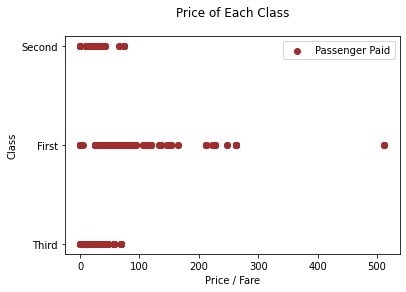

In [10]:
# plot harga yang dibayarkan setiap kelas

plt.scatter(x=titanic['fare'], y=titanic['class'], color='brown', label='Passenger Paid')
plt.title('Price of Each Class', pad=20)
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.legend()
plt.show()

Ada beberapa hal menarik yang dapat kita lihat dari hasil plot scutter. Terlebih dahulu saya coba menjelaskan mengenai grafik ini, grafik ini memperlihatkan banyak penumpang yang membayar harga kamar/class pada kapal titanic. 
1. terdapat penumpang yang membayar harga kamar 1 dengan harga yang sangat fantastis yaitu di atas 500 pund Inggris saat itu.
2. hal menarik selanjutnya adalah, terdapat penumpang yang tidak membayar pada setiap kelasnya, dapat dilihat dari dots pada sumbu x = 0

### 2. Data Cleaning

Pada tahap kedua ini, kita akan coba membersihkan data dengan melihat pada tahap satu terdapat banyak data kosong, dan juga kita akan sedikit merapikan data karena terdapat data column yang memiliki makna sama.

In [11]:
# Kita akan coba melihat setiap data dari column titanic

for i in titanic:
    print(titanic[i].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

1. Terlihat pada data column class dan pclass memiliki data yang sama begitu juga data column embark dan embark_town memiliki data yang sama.
2. Pada data column alive dan data survived memiliki data yang sama -> kita akan mengambil data survived karena data tersebut merupakan data numerikal yaitu (0, 1) agar kita tidak perlu lagi mentransformasikan data tersebut.
3. Pada data column deck terdapat sangat banyak sekali data kosong, agar tidak mengganggu proses machine learning nanti nya, kita akan membuang data column deck tersebut.
4. Pada data column who, mungkin kita tidak terlalu memerlukan ini karena sudah di wakili oleh data column sex dan juga kita tidak terlalu perlu mengetahui apakah ia seorang laki-laki dewasa, ataupun perempuan dewasa ataupun anak-anak. begitu juga dengan data column adult_male.

In [12]:
# Drop/hapus colomns yang tidak diperlukan
titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis = 1, inplace=True)

# kemdudian kita akan menghapus data kosong pada data titanic yang baru
titanic = titanic.dropna()

In [13]:
# maka berikut merupakan data titanic yang telah dilakukan data cleaning
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [14]:
# kemudian berikut dimensi data titanic setelah dilakukan cleaning data
titanic.shape

(712, 9)

In [15]:
# selanjutkan kita akan mencoba mentransformasikan data menjadi data numerik. Terlebih dahulu kita melihat tipe data yang kita miliki
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
alone          bool
dtype: object

kita memiliki data column sex, embarked, alone yang bukan merupakan data column numerik

### 3. Preprocessing Data

Pada tahap ketiga ini, kita akan melakukan transformasi data non numerik menjadi numerik dengan bantuan sckit-learn. hal ini bertujuan agar machine learning dapat mengeksekusi data yang kita miliki. 

#### Step-1: Transformasi Data

In [16]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [17]:
# Kita akan coba lihat tipe data column yang kita miliki terlebih dahulu
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
alone          bool
dtype: object

terlihat bahwa data column sex, embarked dan alone bukan merupakan tipe data numerik. maka kita akan melakukan transformasi pada ketiga data column tersebut.

In [18]:
# Kita akan coba melihat .unique() terhadap data non-numerik terlebih dahulu agar kita bisa melihat perubahan yang terjadi.
print('Column Sex :\n', titanic['sex'].unique())

print('\nColumn embarked :\n', titanic['embarked'].unique())

print('\nColumn alone :\n', titanic['alone'].unique())

Column Sex :
 ['male' 'female']

Column embarked :
 ['S' 'C' 'Q']

Column alone :
 [False  True]


In [19]:
# Transformasi data non-numerik menjadi numerik.
titanic['sex'] = LE.fit_transform(titanic['sex'])
print('Column Sex :\n', LE.classes_)

titanic['embarked'] = LE.fit_transform(titanic['embarked'])
print('\nColumn embarked :\n', LE.classes_)

titanic['alone'] = LE.fit_transform(titanic['alone'])
print('\nColumn alone :\n', LE.classes_)

Column Sex :
 ['female' 'male']

Column embarked :
 ['C' 'Q' 'S']

Column alone :
 [False  True]


Setelah dilakukan transformasi dengan bantuan sckit-learn, maka data non-numerik di ubah menjadi berikut.
1. Column sex : 
   - male   -> 0
   - female -> 1
2. Column embarked :
   - S -> 0
   - C -> 1
   - Q -> 2
3. Column alone :
   - False -> 0
   - True  -> 1

In [20]:
# Sehingga data setelah di tranformasi numerik menjadi seperti berikut.
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1


In [21]:
# Kemdian kita coba melihat kembali dtypes dari dataset titanic yang kita miliki sekarang.
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
alone         int64
dtype: object

semua data sudah menjadi tipe data numerik.

#### Step-2: Membagi 2 data yaitu data target (y) dan data olahan (X)

In [22]:
# kita akan memilah data menjadi data target (y) yang dimana target kita merupakan data orang selamat/survived dari data olahan yaitu X

X = titanic.drop('survived', axis=1)
y = titanic['survived']

### 4. Model Machine Learning

Selanjutnya kita kan membagi data yang kita miliki menjadi 80:20. yaitu 80% training, dan 20% testing test. Menggunakan bantuan sckit-learn

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# Kita perlu melakukan scaling data pada data olahan kita, agar memiliki interval nilai yang sama
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [76]:
# membuat fungsi machine learning dengan 3 metode yaitu LogisticRegression, DecisionTreeClassifier, dan KNeighborsClassifier

def models(X_train, y_train):
    
    # menggunakan LogisticRegression
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(random_state=0)
    logreg = logreg.fit(X_train, y_train)
    y_pred_logreg = logreg.predict(X_test)
    
    # menggunakan DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree = tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    
    # menggunakan KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
    knn = knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    
    # untuk menghitung accurasi dapat menggunakan .score() dan juga menggunakan bantuan sckit-learn metrics
    from sklearn.metrics import confusion_matrix, classification_report
    
    print('1. LogisticRegreesion Accuracy :', logreg.score(X_train, y_train))
    print('\n   LogisticRegreesion Confusion Matrix :\n', confusion_matrix(y_test, y_pred_logreg, labels=[1,0]))
    print('\n   LogisticRegreesion Classification Report :\n', classification_report(y_test, y_pred_logreg))
    
    print('\n2. DecisionTreeClassifier Accuracy :', tree.score(X_train, y_train))
    print('\n   DecisionTreeClassifier Confusion Matrix :\n', confusion_matrix(y_test, y_pred_tree, labels=[1,0]))
    print('\n   DecisionTreeClassifier Classification Report :\n', classification_report(y_test, y_pred_tree))
    
    print('\n3. KNeighborsClassifier Accuracy :', knn.score(X_train, y_train))
    print('\n   KNeighborsClassifier Confusion Matrix :\n', confusion_matrix(y_test, y_pred_knn, labels=[1,0]))
    print('\n   KNeighborsClassifier Classification Report :\n', classification_report(y_test, y_pred_knn))
    
    return y_pred_logreg, y_pred_tree, y_pred_knn

In [77]:
model = models(X_train, y_train)

1. LogisticRegreesion Accuracy : 0.7978910369068541

   LogisticRegreesion Confusion Matrix :
 [[42 19]
 [ 9 73]]

   LogisticRegreesion Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        82
           1       0.82      0.69      0.75        61

    accuracy                           0.80       143
   macro avg       0.81      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143


2. DecisionTreeClassifier Accuracy : 0.9929701230228472

   DecisionTreeClassifier Confusion Matrix :
 [[50 11]
 [28 54]]

   DecisionTreeClassifier Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.66      0.73        82
           1       0.64      0.82      0.72        61

    accuracy                           0.73       143
   macro avg       0.74      0.74      0.73       143
weighted avg       0.75      0.73      0.73       143


3. KNeig

### 5. Kesimpulan

- Pada tingkat accuracy yang didapatkan dari ketiga metode yang digunakan, kita mendapatkan accuracy tertinggi sampai terendah adalah sebagai berikut.
   1. DecisionTreeClassifier Accuracy : 0.9929701230228472
   2. KNeighborsClassifier Accuracy : 0.8664323374340949
   3. LogisticRegreesion Accuracy : 0.7978910369068541
   
- Hasil prediksi TP, TN, FP, FN dari ketiga metode adalah sebagai berikut.
   1. TP :
      - DecisoinTreeClassifier : 50
      - KNeighborsClassifier : 41
      - LogisticRegression : 42
   2. TN :
      - DecisoinTreeClassifier : 54
      - KNeighborsClassifier : 67
      - LogisticRegression : 73
   3. FP :
      - DecisoinTreeClassifier : 11
      - KNeighborsClassifier : 20
      - LogisticRegression : 19
   4. FN :
      - DecisoinTreeClassifier : 28
      - KNeighborsClassifier : 15
      - LogisticRegression : 9

Keterangan : 
1. TP = True Positif -> benar menebak survivor yang selamat
2. TN = True Negatif -> benar menebak survivor yang tidak selamat
3. FP = False Positif -> menebak survivor selamat namun kenyataan tidak selamat
4. FN = False Negatif -> menebak survivor tidak selamat namun kenyataaan selamat

### 6. Saran

Untuk lebih menyempurnakan hasil pada penelitian selanjutnya peneliti menyarankan dapat dengan melakukan pengisisan data null dengan hal nilai lainnya. dan juga untuk menyempurnakan hasil pada penelitian selanjutnya peneliti menyarankan dapat menggunakan metode prediction lainnya agar dapat melihat tingkat accuracy yang lebih baik dari ketiga metode yang dignakan pada penelitian saat ini. 